In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [4]:
def uniform_noise(size, prob=0.1):
    '''
    Generates a matrix with uniform noise in the range [0-255] to be added to an image
    
    :param size: tuple defining the size of the noise matrix 
    :param prob: probability for the uniform noise generation 
    :type prob: float
    :return matrix with uniform noise to be added to image
    '''
    
    levels = int((prob * 255) // 2)
    noise = np.random.randint(-levels, levels, size)
    
    return noise

In [7]:
img = imageio.imread("pattern2.png")
np.unique(img)

Array([ 32, 127, 186], dtype=uint8)

In [8]:
uni_noise = uniform_noise(img.shape, prob=0.1)
img_uni = np.clip(img.astype(int)+uni_noise, 0, 255)

hist_img,_ = np.histogram(img, bins=256, range=(0,255))
hist_uni,_ = np.histogram(img_uni, bins=256, range=(0,255))

<BarContainer object of 256 artists>

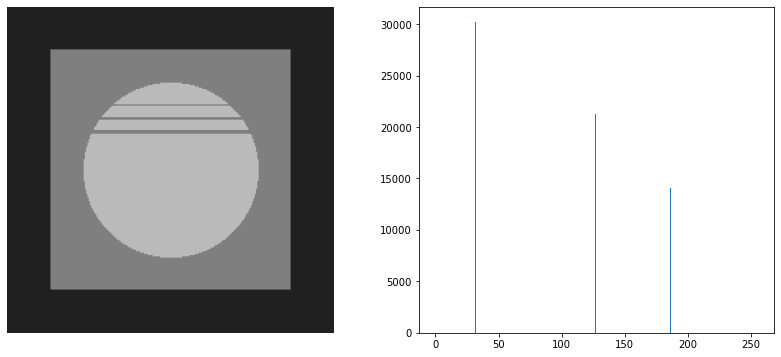

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_img)

<BarContainer object of 256 artists>

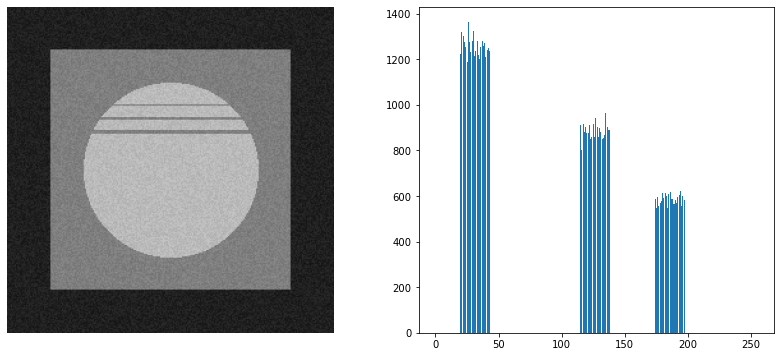

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img_uni, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_uni)

#print(np.unique(img_uni))

In [11]:
def gaussian_noise(size, mean=0, std=0.01):
    '''
    Generates a matrix with Gaussian noise in the range [0-255] to be added to an image
    
    :param size: tuple defining the size of the noise matrix 
    :param mean: mean of the Gaussian distribution
    :param std: standard deviation of the Gaussian distribution, default 0.01
    :return matrix with Gaussian noise to be added to image
    '''
    noise = np.multiply(np.random.normal(mean, std, size), 255)
    
    return noise

In [12]:
# creating the noise matrix to be added
gau_noise = gaussian_noise(img.shape, mean=0, std=0.05)

# adding and clipping values below 0 or above 255
img_gau = np.clip(img.astype(int)+gau_noise, 0, 255)

hist_gau,_ = np.histogram(img_gau, bins=256, range=(0,255))

<BarContainer object of 256 artists>

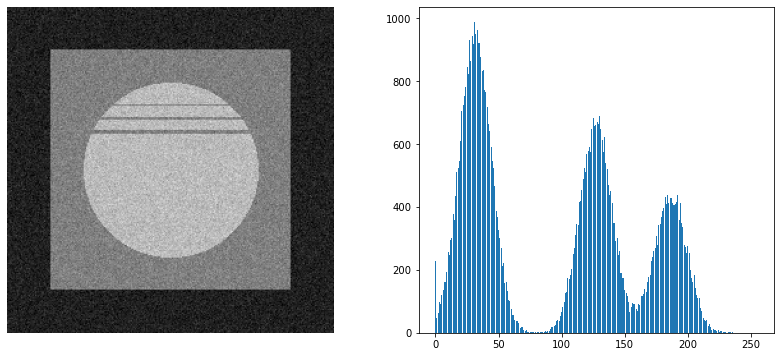

In [13]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img_gau, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_gau)

In [14]:
#In the case of Gaussian noise, the values are more likely around the intensity values, which are the mean of the distribution. Note the histogram shape, which indicates a multimodal normal distribution.
def impulsive_noise(image, prob=0.1, mode='salt_and_pepper'):
    '''
    Returns image with impulsive noise (0 and/or 255) to replace pixels in the image with some probability
    
    :param image: input image
    :param prob: probability for the impulsive noise generation 
    :param mode: type of noise, 'salt', 'pepper' or 'salt_and_pepper' (default)
    :type prob: float
    :return noisy image with impulsive noise
    '''

    noise = np.array(image, copy=True)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            rnd = np.random.random()
            if rnd < prob:
                rnd = np.random.random()
                if rnd > 0.5:
                    noise[x,y] = 255
                else:
                    noise[x,y] = 0
    
    return noise

In [15]:
img_imp = impulsive_noise(img, prob=0.1)

hist_imp,_ = np.histogram(img_imp, bins=256, range=(0,255))

<BarContainer object of 256 artists>

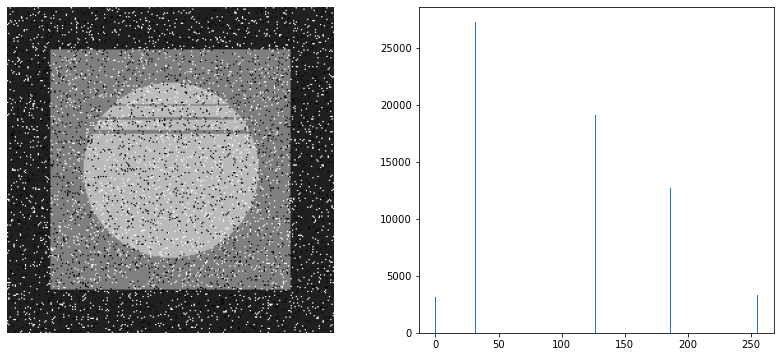

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(img_imp, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_imp)

In [18]:
#Denoising methods
# generating noise and subtracting it from the image
uni_noise_new = uniform_noise(img.shape, prob=0.1)
img_uni_res = img_uni - uni_noise_new

def rmse(f,g):
    size = f.shape
    return np.sqrt(np.sum(np.square(f-g))/(size[0]*size[1]))

print("Error between noisy and original: %.3f%%" % (rmse(img.astype(float), img_uni.astype(float))))
print("Error between 'restored' and original: %.3f%%" % (rmse(img_uni_res.astype(float), img.astype(float))))

Error between noisy and original: 6.936%
Error between 'restored' and original: 9.781%


(-0.5, 255.5, 255.5, -0.5)

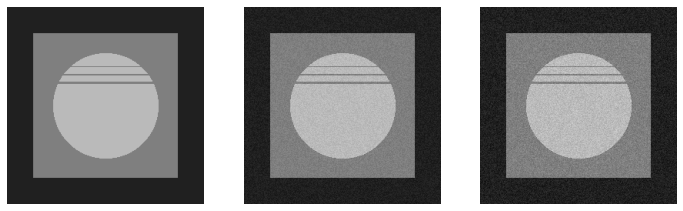

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(132)
plt.imshow(img_uni, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(133)
plt.imshow(img_uni_res, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

In [20]:
#Denoising filters
# importing the fft algorithms
# including the transform, inverse and the shift methods
from scipy.fftpack import fftn, ifftn, fftshift

In [21]:
# reading a new image and inclucing gaussian noise
f = imageio.imread("moon2.jpg")
g = f + gaussian_noise(f.shape, mean=0, std=0.08)
g = np.clip(g.astype(int), 0, 255)

# creating a 7x7 mean filter
K = 7
w_mean = np.ones([K,K])/float(K*K)

def fft_imagefilter(g, w):
    ''' A function to filter an image g with the filter w
    '''
    # padding the filter so that it has the same size of the image
    pad1 = (g.shape[0]//2)-w.shape[0]//2
    wp = np.pad(w, (pad1,pad1-1), "constant",  constant_values=0)

    # computing the Fourier transforms
    W = fftn(wp)
    G = fftn(g)
    R = np.multiply(W,G)
    
    r = np.real(fftshift(ifftn(R)))
    return r

r_mean = fft_imagefilter(g, w_mean)

(-0.5, 255.5, 255.5, -0.5)

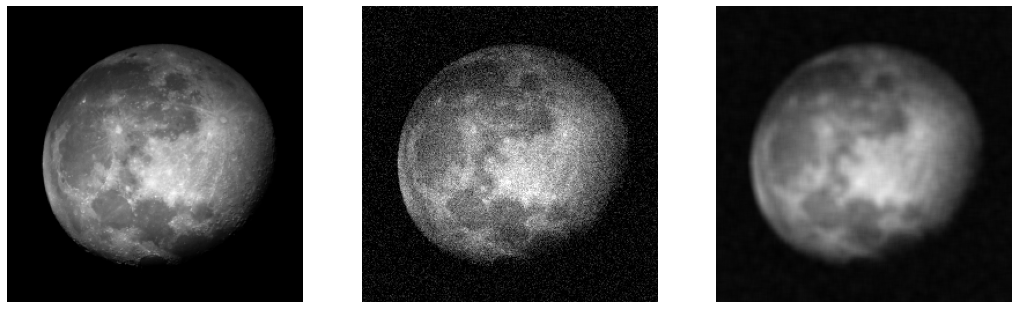

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(f, cmap="gray", vmin=0, vmax=255); plt.axis('off')
plt.subplot(132)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.axis('off')
plt.subplot(133)
plt.imshow(r_mean, cmap="gray", vmin=0, vmax=255); plt.axis('off')

In [23]:
def medianfilter(g, k):
    ''' A median filter with size k
    '''
    a = k//2
    r = np.zeros(g.shape)
    for x in np.arange(a, g.shape[0]-a+1):
        for y in np.arange(a, g.shape[1]-a+1):
            med_region = np.median(g[x-a:x+a+1, y-a:y+a+1])
            r[x,y] = med_region
    
    return r

r_median = medianfilter(g,7)

Text(0.5, 1.0, 'median filter')

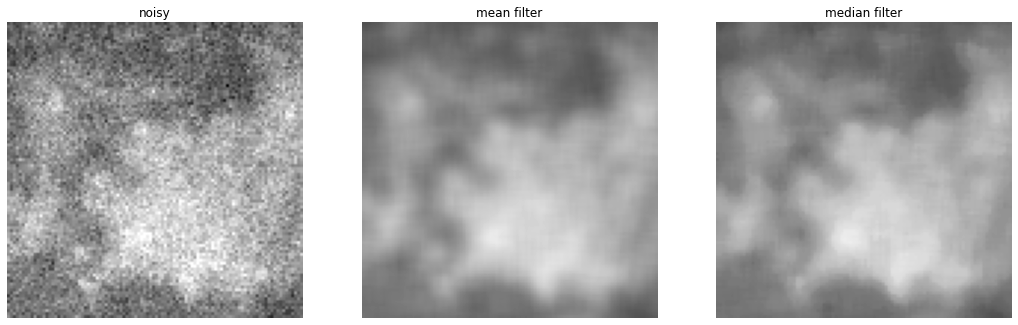

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(g[80:180,80:180], cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('noisy')
plt.subplot(132)
plt.imshow(r_mean[80:180,80:180], cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('mean filter')
plt.subplot(133)
plt.imshow(r_median[80:180,80:180], cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('median filter')

In [25]:
img_imp = impulsive_noise(img, prob=0.05)

w_mean3 = np.ones([3,3])/float(3*3)
img_mean = fft_imagefilter(img_imp, w_mean3)
img_median = medianfilter(img_imp, 3)

Text(0.5, 1.0, 'median filter')

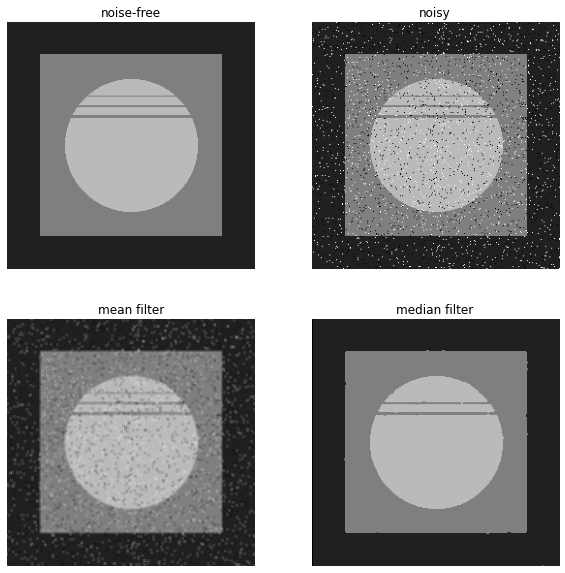

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img, cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('noise-free')
plt.subplot(222)
plt.imshow(img_imp, cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('noisy')
plt.subplot(223)
plt.imshow(img_mean, cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('mean filter')
plt.subplot(224)
plt.imshow(img_median, cmap="gray", vmin=0, vmax=255); plt.axis('off'); plt.title('median filter')